## Part 1： 模型理论与应用
在第一部分主要以证明和推导为主。以下几个问题都是比较经典的问题，会对模型的深入理解会有很大的帮助。

### Part 1.1 逻辑回归相关 (30分)
假设我们有训练数据$D=\{(\mathbf{x}_1,y_1),...,(\mathbf{x}_n,y_n)\}$, 其中$(\mathbf{x}_i,y_i)$为每一个样本，而且$\mathbf{x}_i$是样本的特征并且$\mathbf{x}_i\in \mathcal{R}^D$, $y_i$代表样本数据的标签（label）, 取值为$0$或者$1$. 在逻辑回归中，模型的参数为$(\mathbf{w},b)$。对于向量，我们一般用粗体来表达。请回答以下问题。最好用Markdown自带的Latex来编写。（如果实在不行，可以手写然后拍照完放入word或者转成PDF，作为独立的文件来提交）

(a) 在逻辑回归模型下，请写出目标函数（objective function）, 也就是我们需要"最小化"的目标（也称之为损失函数或者loss function)，不需要考虑正则 （3分）

$L(\mathbf{w},b)=-\sum_{i=1}^{n}(y_i log(\frac{1}{1+exp(w^Tx_i+b)})+(1-y_i)log(1-\frac{1}{1+exp(w^Tx_i+b)}))$

(b) 求出$L(\mathbf{w},b)$的梯度（或者计算导数），需要必要的中间过程。（5分）

$\begin{aligned}\frac{\partial L(\mathbf{w},b)}{\partial \mathbf{w}}
&=-\sum_{i=1}^{n}(y_i \frac{\partial }{\partial \mathbf{w}} \log(\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)})+(1-y_i) \frac{\partial }{\partial \mathbf{w}} \log(1-\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)}))\\
&=-\sum_{i=1}^{n}[y_i (1+\exp(\mathbf{w}^Tx_i+b)) \frac{\partial }{\partial \mathbf{w}} \frac{1}{1+\exp(\mathbf{w}^Tx_i+b)}-(1-y_i) \frac{1+\exp(\mathbf{w}^Tx_i+b)}{\exp(\mathbf{w}^Tx_i+b)} \frac{\partial }{\partial \mathbf{w}} \frac{1}{1+\exp(\mathbf{w}^Tx_i+b)}]\\
&=-\sum_{i=1}^{n}(y_i (1+\exp(\mathbf{w}^Tx_i+b))-(1-y_i) \frac{1+\exp(\mathbf{w}^Tx_i+b)}{\exp(\mathbf{w}^Tx_i+b)}) \frac{\partial }{\partial \mathbf{w}} \frac{1}{1+\exp(\mathbf{w}^Tx_i+b)}\\
&=-\sum_{i=1}^{n}(y_i (1+\exp(\mathbf{w}^Tx_i+b))-(1-y_i) \frac{1+\exp(\mathbf{w}^Tx_i+b)}{\exp(\mathbf{w}^Tx_i+b)}) \frac{1}{(1+\exp(\mathbf{w}^Tx_i+b))^2}\frac{\partial }{\partial \mathbf{w}}\exp(\mathbf{w}^Tx_i+b)\\
&=-\sum_{i=1}^{n}(y_i- \frac{(1-y_i)}{\exp(\mathbf{w}^Tx_i+b)}) \frac{1}{1+\exp(\mathbf{w}^Tx_i+b)}\frac{\partial }{\partial \mathbf{w}}\exp(\mathbf{w}^Tx_i+b)\\
&=-\sum_{i=1}^{n}(y_i- \frac{(1-y_i)}{\exp(\mathbf{w}^Tx_i+b)}) \frac{\exp(\mathbf{w}^Tx_i+b)}{1+\exp(\mathbf{w}^Tx_i+b)}\frac{\partial }{\partial \mathbf{w}}(\mathbf{w}^Tx_i+b)\\
&=-\sum_{i=1}^{n} \frac{y_i \exp(\mathbf{w}^Tx_i+b)- (1-y_i)}{1+\exp(\mathbf{w}^Tx_i+b)}\frac{\partial }{\partial \mathbf{w}}(\mathbf{w}^Tx_i+b)\\
&=-\sum_{i=1}^{n} \frac{y_i (1+\exp(\mathbf{w}^Tx_i+b)) - 1}{1+\exp(\mathbf{w}^Tx_i+b)}\frac{\partial }{\partial \mathbf{w}}(\mathbf{w}^Tx_i+b)\\
&=-\sum_{i=1}^{n} (y_i - \frac{1}{1+\exp(\mathbf{w}^Tx_i+b)})\frac{\partial }{\partial \mathbf{w}}(\mathbf{w}^Tx_i+b)\\
&=\sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i)\frac{\partial (\mathbf{w}^Tx_i+b)}{\partial \mathbf{w}}\\
&=\sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i)\frac{\partial \mathbf{w}^Tx_i}{\partial \mathbf{w}}\\
&=\sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i) x_i\\
\end{aligned}$

$\begin{aligned}\frac{\partial L(\mathbf{w},b)}{\partial b}
&=\sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i)\frac{\partial (\mathbf{w}^Tx_i+b)}{\partial b}\\
&=\sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i)\frac{\partial b}{\partial b}\\
&=\sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i)\\
\end{aligned}$

(c) 请写出基于梯度下降法（batch）的对于$\mathbf{w}$和$b$的更新 （5分）

$\mathbf{w}^{t+1}=\mathbf{w}^t -\alpha \sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i) x_i$

$b^{t+1}=b^t - \alpha \sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i)$

(d) 假设在(a)的基础上加了一个L2正则项，请写出基于梯度下降法（batch）的对于$\mathbf{w}$和$b$的更新 （5分）

$\mathbf{w}^{t+1}=\mathbf{w}^t -\alpha (\sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i) x_i + \lambda \mathbf{w})$

$b^{t+1}=b^t - \alpha (\sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i)+\lambda)$

接下来我们来证明逻辑回归函数是凸函数。假设一个函数是凸函数，我们则可以得出局部最优解即为全局最优解，所以假设我们通过随机梯度下降法等手段找到最优解
时我们就可以确认这个解就是全局最优解。证明凸函数的方法有很多种，在这里我们介绍一种方法，就是基于二次求导大于等于0。比如给定一个函数$f(x)=x^2-3x+3$，做两次
求导之后即可以得出$f''(x)=2 > 0$，所以这个函数就是凸函数。类似的，这种理论也应用于多元变量中的函数上。在多元函数上，只要证明二阶导数是posititive semidefinite即可以。

(e) 在(b)的基础上接着对$\mathbf{w}$求导（等于二阶导数，二阶导数的维度为$D\times D$），这个二阶导数也称之为Hessian Matrix(https://en.wikipedia.org/wiki/Hessian_matrix) 对于矩阵、向量的求导请参考：https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf （8分）


$\begin{aligned}\frac{\partial^2 \mathcal{L}}{\partial^2 \mathbf{w}}
&=\frac{\partial }{\partial \mathbf{w}} \sum_{i=1}^{n} (\frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} - y_i) x_i\\
&=\sum_{i=1}^{n} x_i \frac{\partial }{\partial \mathbf{w}} \frac{1}{1+\exp(\mathbf{w}^Tx_i+b)} \\
&=\sum_{i=1}^{n}  \frac{x_i}{(1+\exp(\mathbf{w}^Tx_i+b))^2} \frac{\partial }{\partial \mathbf{w}} \exp(\mathbf{w}^Tx_i+b) \\
&=\sum_{i=1}^{n}  \frac{x_i \exp(\mathbf{w}^Tx_i+b)}{(1+\exp(\mathbf{w}^Tx_i+b))^2} \frac{\partial }{\partial \mathbf{w}}(\mathbf{w}^Tx_i+b) \\
&=\sum_{i=1}^{n}  \frac{x_i \exp(\mathbf{w}^Tx_i+b)}{(1+\exp(\mathbf{w}^Tx_i+b))^2} \frac{\partial (\mathbf{w}^Tx_i+b)}{\partial \mathbf{w}} \\
&=\sum_{i=1}^{n}  \frac{x_i \exp(\mathbf{w}^Tx_i+b)}{(1+\exp(\mathbf{w}^Tx_i+b))^2} x_i \\
&=\sum_{i=1}^{n}  \frac{x_i^2 \exp(\mathbf{w}^Tx_i+b)}{(1+\exp(\mathbf{w}^Tx_i+b))^2}\\
\end{aligned}$

(f) 请说明在(e)的得出来的Hessian Matrix是Positive Definite. 提示：为了证明一个$D\times D$的矩阵$H$为Positive Semidefinite，需要证明对于任意一个非零向量$v\in \mathcal{R}^D$, 需要得出$v^{T}Hv >=0$ （4分）

请推导或者说明：

$\begin{aligned}v^{T}Hv &= v^T\frac{\partial^2 \mathcal{L}}{\partial^2 \mathbf{w}}v\\
&=v^T\sum_{i=1}^{n} \frac{x_i^2 \exp(\mathbf{w}^Tx_i+b)}{(1+\exp(\mathbf{w}^Tx_i+b))^2}v\\
&=\sum_{i=1}^{n} \frac{v^T x_i^2 \exp(\mathbf{w}^Tx_i+b) v}{(1+\exp(\mathbf{w}^Tx_i+b))^2}\\
&=\sum_{i=1}^{n} \frac{v^T v x_i^2 \exp(\mathbf{w}^Tx_i+b) }{(1+\exp(\mathbf{w}^Tx_i+b))^2}\\
&=\sum_{i=1}^{n} \frac{||v||^2 x_i^2 \exp(\mathbf{w}^Tx_i+b) }{(1+\exp(\mathbf{w}^Tx_i+b))^2}\\
&>=0\\
\end{aligned}$

## Part 2： 情感分析项目 (70分)_

本项目的目标是基于用户提供的评论，通过算法自动去判断其评论是正面的还是负面的情感。比如给定一个用户的评论：
- 评论1： “我特别喜欢这个电器，我已经用了3个月，一点问题都没有！”
- 评论2： “我从这家淘宝店卖的东西不到一周就开始坏掉了，强烈建议不要买，真实浪费钱”

对于这两个评论，第一个明显是正面的，第二个是负面的。 我们希望搭建一个AI算法能够自动帮我们识别出评论是正面还是负面。

情感分析的应用场景非常丰富，也是NLP技术在不同场景中落地的典范。比如对于一个证券领域，作为股民，其实比较关注舆论的变化，这个时候如果能有一个AI算法自动给网络上的舆论做正负面判断，然后把所有相关的结论再整合，这样我们可以根据这些大众的舆论，辅助做买卖的决策。 另外，在电商领域评论无处不在，而且评论已经成为影响用户购买决策的非常重要的因素，所以如果AI系统能够自动分析其情感，则后续可以做很多有意思的应用。 

情感分析是文本处理领域经典的问题。整个系统一般会包括几个模块：
- 数据的抓取： 通过爬虫的技术去网络抓取相关文本数据
- 数据的清洗/预处理：在本文中一般需要去掉无用的信息，比如各种标签（HTML标签），标点符号，停用词等等
- 把文本信息转换成向量： 这也成为特征工程，文本本身是不能作为模型的输入，只有数字（比如向量）才能成为模型的输入。所以进入模型之前，任何的信号都需要转换成模型可识别的数字信号（数字，向量，矩阵，张量...)
- 选择合适的模型以及合适的评估方法。 对于情感分析来说，这是二分类问题（或者三分类：正面，负面，中性），所以需要采用分类算法比如逻辑回归，朴素贝叶斯，神经网络，SVM等等。另外，我们需要选择合适的评估方法，比如对于一个应用，我们是关注准确率呢，还是关注召回率呢？ 

在本次项目中，我们已经给定了训练数据和测试数据，它们分别是 train.positive.txt, train.negative.txt， test_combined.txt. 请注意训练数据和测试数据的格式不一样，详情请见文件内容。 整个项目你需要完成以下步骤：

数据的读取以及清洗： 从给定的.txt中读取内容，并做一些数据清洗，这里需要做几个工作： （1） 文本的读取，需要把字符串内容读进来。 （2）去掉无用的字符比如标点符号，多余的空格，换行符等 （3） 分词
把文本转换成TF-IDF向量： 这部分直接可以利用sklearn提供的TfidfVectorizer类来做。
利用逻辑回归模型来做分类，并通过交叉验证选择最合适的超参数
利用支持向量机做分类，并通过交叉验证选择神经网络的合适的参数

### File Reading: 文本读取 （5分）

In [1]:
import pandas
import jieba
import itertools
import xml.etree.ElementTree
import lxml.etree
import matplotlib.pyplot
import math
import random
import operator
import string
import re
import numpy
import sklearn.feature_extraction.text
import sklearn.linear_model
import sklearn.model_selection
import bayes_opt

In [2]:
def read_file(file_name):
    doc = open(file_name,'r',encoding='utf-8-sig')
    it = itertools.chain('<root>', doc.readlines(), '</root>')
    root = xml.etree.ElementTree.fromstringlist(it,parser=lxml.etree.XMLParser(recover=True))
    for child in root:
        if child.attrib.has_key('label'):
            yield child.attrib['label'], child.text
            continue
        yield child.text

def process_file():
    """
    读取训练数据和测试数据，并对它们做一些预处理
    """    
    train_pos_file = "data/train.positive.txt"
    train_neg_file = "data/train.negative.txt"
    test_comb_file = "data/test.combined.txt"
    
    # TODO: 读取文件部分，把具体的内容写入到变量里面
    


    train_comments = []
    train_labels = []
    test_comments = []
    test_labels = []

    for label, comment in read_file(test_comb_file):
        test_labels.append(int(label))
        test_comments.append(comment)
    
    for comment in read_file(train_pos_file):
        train_comments.append(comment)
        train_labels.append(1)
        
    for comment in read_file(train_neg_file):
        train_comments.append(comment)
        train_labels.append(0)
    return train_comments, train_labels,test_comments,test_labels

def twoSampZ(s1,s2,mudiff):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    X1 = s1.mean()
    X2 = s2.mean()
    sd1 = s1.std()
    sd2 = s2.std()
    n1 = s1.count()
    n2 = s2.count()
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return z, pval

def pre_process(stopword,sentence_list):
    result_list = []
    for sentence in sentence_list:
        sentence_cut = []
        for cut in jieba.cut(sentence):
            word = re.sub(r'[^\u4e00-\u9fa5]', '', cut)
            if len(word) > 0 and word not in stopword:
                sentence_cut.append(word)
        result_list.append(sentence_cut)
    return result_list

### Explorary Analysis: 做一些简单的可视化分析 （10分） 

In [3]:
# 训练数据和测试数据大小
train_comments, train_labels,test_comments,test_labels = process_file()
print (len(train_comments), len(test_comments))

8065 2500


positive samples: mean=3.654828 std=0.939751 n=5000.000000
negative samples: mean=3.774089 std=0.872872 n=3065.000000
z = -5.783609,p = 0.000000
双样本z test显示mean有显著差距，具体应该是样本数量足够大，但是从绝对值上看，相差不大


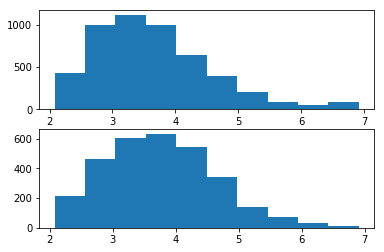

In [4]:
# TODO: 对于训练数据中的正负样本，分别画出一个histogram， histogram的x抽是每一个样本中字符串的长度，y轴是拥有这个长度的样本的百分比。
#       并说出样本长度是否对情感有相关性 (需要先用到结巴分词)
#       参考：https://en.wikipedia.org/wiki/Histogram
positive_length = []
negative_length = []
for i in range(len(train_comments)):
    if train_labels[i] == 1:
        positive_length.append(len(train_comments[i]))
    else:
        negative_length.append(len(train_comments[i]))
log_positive_length = pandas.Series([math.log(l) for l in positive_length])
log_negative_length = pandas.Series([math.log(l) for l in negative_length])
matplotlib.pyplot.subplot(211)
matplotlib.pyplot.hist(log_positive_length)
matplotlib.pyplot.subplot(212)
matplotlib.pyplot.hist(log_negative_length)
z,p = twoSampZ(log_positive_length,log_negative_length , 0)
print('positive samples: mean=%f std=%f n=%f'%(log_positive_length.mean(),log_positive_length.std(),log_positive_length.count()))
print('negative samples: mean=%f std=%f n=%f'%(log_negative_length.mean(),log_negative_length.std(),log_negative_length.count()))
print('z = %.6f,p = %.6f'%(z,p))
print('双样本z test显示mean有显著差距，具体应该是样本数量足够大，但是从绝对值上看，相差不大')
matplotlib.pyplot.show()

In [5]:
# TODO： 分别列出训练数据中正负样本里的top 20单词（可以做适当的stop words removal）。 
stopword_list='的了是我'
stopword = {x for x in stopword_list}

pos_word = {}
neg_word = {}
train_comments_cut = []
test_comments_cut = []
train_comments_cut = pre_process(stopword,train_comments)
test_comments_cut = pre_process(stopword,test_comments)

for i in range(len(train_comments)):
    if train_labels[i] == 1:
        for word in train_comments_cut[i]:
            if word in pos_word.keys():
                pos_word[word] += 1
            else:
                pos_word[word] = 1
    else:
        for word in train_comments_cut[i]:
            if word in neg_word.keys():
                neg_word[word] += 1
            else:
                neg_word[word] = 1

pos_word = sorted(pos_word.items(), key=operator.itemgetter(1), reverse=True)
neg_word = sorted(neg_word.items(), key=operator.itemgetter(1), reverse=True)
print('positive: ',pos_word[:20])
print('negative: ',neg_word[:20])

Building prefix dict from the default dictionary ...
Loading model from cache D:\Mengbo\AppData\Local\Temp\jieba.cache
Loading model cost 0.903 seconds.
Prefix dict has been built succesfully.


positive:  [('很', 2365), ('也', 1354), ('在', 1340), ('有', 1287), ('都', 1177), ('好', 1108), ('不错', 1076), ('就', 981), ('买', 950), ('喜欢', 914), ('这', 866), ('和', 815), ('看', 719), ('还', 719), ('不', 707), ('人', 607), ('没有', 578), ('非常', 556), ('可以', 550), ('还是', 538)]
negative:  [('不', 997), ('买', 871), ('就', 855), ('也', 850), ('都', 827), ('很', 798), ('有', 762), ('在', 759), ('没有', 693), ('还', 540), ('卓越', 535), ('说', 487), ('这', 461), ('和', 427), ('好', 417), ('看', 408), ('啊', 355), ('人', 353), ('这个', 344), ('上', 331)]


##### Text Cleaning: 文本处理部分 （10分）

In [6]:
# TODO：对于train_comments, test_comments进行字符串的处理，几个考虑的点：
#   1. 停用词过滤
#   2. 去掉特殊符号
#   3. 去掉数字（比如价格..)
#   4. ...
#   需要注意的点是，由于评论数据本身很短，如果去掉的太多，很可能字符串长度变成0
#   预处理部分，可以自行选择合适的方.
train_comments_new = []
test_comments_new = []
y_train = [] # 训练数据的label
y_test = [] # 测试数据的label
for i in range(len(train_comments_cut)):
    if len(train_comments_cut[i])>3:
        train_comments_new.append(' '.join(train_comments_cut[i]))
        y_train.append(train_labels[i])
for i in range(len(test_comments_cut)):
    if len(test_comments_cut[i])>3:
        test_comments_new.append(' '.join(test_comments_cut[i]))
        y_test.append(test_labels[i])

### Feature Extraction : 从文本中提取特征 （10分）

In [7]:
# TODO: 利用tf-idf从文本中提取特征,写到数组里面. 
#       参考：https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer()  # 定义一个tf-idf的vectorizer
X_train = vectorizer.fit_transform(train_comments_new) # 训练数据的特征
X_test = vectorizer.transform(test_comments_new) # 测试数据的特征


print (numpy.shape(X_train), numpy.shape(X_test), numpy.shape(y_train), numpy.shape(y_test))

(7438, 23257) (2319, 23257) (7438,) (2319,)


### Modeling: 训练模型以及选择合适的超参数 （25分）

In [8]:
from sklearn.linear_model import LogisticRegression
# TODO： 利用逻辑回归来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       逻辑回归的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#       对于逻辑回归，经常调整的超参数为： C

grid={"C":numpy.logspace(-3,3,7)}
logreg=sklearn.linear_model.LogisticRegression(solver='lbfgs',max_iter=1000)
logreg_cv=sklearn.model_selection.GridSearchCV(logreg,grid,cv=10,scoring='f1')
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print(logreg_cv.scorer_," :",logreg_cv.best_score_)
y_pred = logreg_cv.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

tuned hpyerparameters :(best parameters)  {'C': 1.0}
make_scorer(f1_score)  : 0.8263340281241724
              precision    recall  f1-score   support

           0       0.86      0.55      0.67      1176
           1       0.66      0.91      0.77      1143

   micro avg       0.73      0.73      0.73      2319
   macro avg       0.76      0.73      0.72      2319
weighted avg       0.76      0.73      0.72      2319



In [9]:
from sklearn import svm
# TODO： 利用SVM来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel

        
grid=[{'kernel': ['rbf','poly','sigmoid'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
                 'C': [1, 10, 100, 1000]}]
svm=sklearn.svm.SVC()
svm_cv=sklearn.model_selection.GridSearchCV(svm,grid,cv=10,scoring='f1')
svm_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print(svm_cv.scorer_," :",svm_cv.best_score_)
y_pred = svm_cv.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))


tuned hpyerparameters :(best parameters)  {'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}
make_scorer(f1_score)  : 0.8251457700623123
              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1176
           1       0.68      0.88      0.77      1143

   micro avg       0.74      0.74      0.74      2319
   macro avg       0.76      0.74      0.74      2319
weighted avg       0.76      0.74      0.74      2319



对于超参数的调整，我们经常使用gridsearch，这也是工业界最常用的方法，但它的缺点是需要大量的计算，所以近年来这方面的研究也成为了重点。 其中一个比较经典的成果为Bayesian Optimization（利用贝叶斯的思路去寻找最好的超参数）。Ryan P. Adams主导的Bayesian Optimization利用高斯过程作为后验概率（posteior distribution）来寻找最优解。 https://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf 在下面的练习中，我们尝试使用Bayesian Optimization工具来去寻找最优的超参数。参考工具：https://github.com/fmfn/BayesianOptimization

In [10]:
# TODO: 仍然使用SVM模型，但在这里使用Bayesian Optimization来寻找最好的超参数。 
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用Bayesian Optimization https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel
#       参考Bayesian Optimization开源工具： https://github.com/fmfn/BayesianOptimization

def optimizer_svc(X,y):
    def svc_cv(C,gamma):
        svm=sklearn.svm.SVC(C=10 ** C,gamma=10 ** gamma,kernel='sigmoid')
        return sklearn.model_selection.cross_val_score(svm,X=X,y=y,scoring='f1',cv=10).mean()
    grid={'gamma': (-3, 3),'C': (-4, 4)}
    optimizer = bayes_opt.BayesianOptimization(f=svc_cv,pbounds = grid,verbose=2)
    optimizer.maximize(n_iter=10)
    return optimizer
result = optimizer_svc(X_train,y_train)
print("Final result:",result.max)


|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
|  1        |  0.6999   |  3.037    |  2.179    |
|  2        |  0.7719   |  2.425    | -0.9167   |
|  3        |  0.7613   | -3.431    | -1.745    |
|  4        |  0.7613   | -3.586    | -2.827    |
|  5        |  0.7252   |  3.894    | -0.7129   |
|  6        |  0.7613   | -4.0      |  3.0      |
|  7        |  0.7613   |  0.5803   | -3.0      |
|  8        |  0.7229   | -0.8745   |  1.741    |
|  9        |  0.7613   | -4.0      |  0.6979   |
|  10       |  0.8112   |  0.3567   | -1.102    |
|  11       |  0.7613   | -0.875    | -1.623    |
|  12       |  0.7863   |  4.0      | -3.0      |
|  13       |  0.7793   |  0.832    |  0.12     |
|  14       |  0.8235   |  2.514    | -3.0      |
|  15       |  0.7032   |  4.0      |  3.0      |
Final result: {'target': 0.8234636532580888, 'params': {'C': 2.5138460483214984, 'gamma': -3.0}}


### 特征: 添加n-gram特征 (10分)
在原有tf-idf特征的基础上，添加n-gram特征（在这里我们使用bi-gram特征）。添加完之后效果是否有提升？ 为什么？

In [11]:
train_comments, train_labels, test_comments, test_labels = process_file()
train_comments_cut = pre_process(set(), train_comments)
test_comments_cut = pre_process(set(), test_comments)

train_comments_new = []
y_train = []
for i in range(len(train_comments_cut)):
    cut = train_comments_cut[i]
    if len(cut)>1:
        bi_gram = []
        for j in range(len(cut)-1):
            bi_gram.append(cut[j]+cut[j+1])
        train_comments_new.append(' '.join(cut+bi_gram))
        y_train.append(train_labels[i])

test_comments_new = []
y_test = []
for i in range(len(test_comments_cut)):
    cut = test_comments_cut[i]
    if len(cut)>1:
        bi_gram = []
        for j in range(len(cut)-1):
            bi_gram.append(cut[j]+cut[j+1])
        test_comments_new.append(' '.join(cut+bi_gram))
        y_test.append(test_labels[i])


vectorizer = sklearn.feature_extraction.text.TfidfVectorizer()  # 定义一个tf-idf的vectorizer
X_train = vectorizer.fit_transform(train_comments_new)  # 结果存放在X矩阵
X_test = vectorizer.transform(test_comments_new)

print (numpy.shape(X_train), numpy.shape(X_test), numpy.shape(y_train), numpy.shape(y_test))

(7973, 163599) (2479, 163599) (7973,) (2479,)


In [12]:
## TODO 模型的训练，如上
grid={"C":numpy.logspace(-3,3,7)}
logreg=sklearn.linear_model.LogisticRegression(solver='lbfgs',max_iter=1000)
logreg_cv=sklearn.model_selection.GridSearchCV(logreg,grid,cv=10,scoring='f1')
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print(logreg_cv.scorer_," :",logreg_cv.best_score_)
y_pred = logreg_cv.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))


tuned hpyerparameters :(best parameters)  {'C': 10.0}
make_scorer(f1_score)  : 0.8398903690360119
              precision    recall  f1-score   support

           0       0.85      0.63      0.73      1239
           1       0.71      0.89      0.79      1240

   micro avg       0.76      0.76      0.76      2479
   macro avg       0.78      0.76      0.76      2479
weighted avg       0.78      0.76      0.76      2479

